In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('hiber_train_zscore.csv')

train_labels = df['label']
train_labels = np.array(train_labels)
print(train_labels)

train_features = df.iloc[:,:3]
train_features = np.array(train_features)
print(train_features)

print('train_features', train_features.shape)
print('train_labels', train_labels.shape)

df = pd.read_csv('hiber_test_zscore.csv')

test_labels = df['label']
test_labels = np.array(test_labels)
print(test_labels)

test_features = df.iloc[:,:3]
test_features = np.array(test_features)
print(test_features)

print('test_features', test_features.shape)
print('test_labels', test_labels.shape)

[1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 2
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 2 2 1 1 1 1 2 2 1 1 1 1 1 2 2 2
 1 1 1 2 2 2 1 1 1 1 1 1 2 2 1 1 1 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 2
 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 2 2 2 2 2 1 1 1 1 2 2 1 1 1 1 1 1 2 2 1 1
 1 1 1 1 2 2 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 2
 2 2 1 1 1 1 2 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 2 2 1 1 2
 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 1 1 2 1 1 1 2 2]
[[-2.08583698  0.39809964 -0.40449359]
 [-2.08583698 -0.22512344 -0.10050301]
 [-1.99222458 -1.15995804 -0.2524983 ]
 [-1.99222458  0.70971117  0.05149228]
 [-1.80499979 -1.47156958  0.96346402]
 [-1.80499979 -0.84834651 -0.55648888]
 [-1.7113874  -1.15995804 -0.55648888]
 [-1.7113874   1.02132271  0.81146873]
 [-1.7113874  -1.47156958  4.00336981]
 [-1.7113874  -0.84834651 -0.40449359]
 [-1.7113874  -0.53673497  0.96346402]
 [-1.7113874   1.33293424  0.50747815]
 [-1.7113874  -0.84834651 -0.55648

In [3]:
# 导入包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from vecstack import stacking
from sklearn.model_selection import GridSearchCV,ParameterGrid
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import warnings

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
warnings.filterwarnings('ignore')


In [5]:
#获取准确率最高的rel_knn_algorithm、rel_weight和rel_nearest_neighbor
from sklearn import neighbors,decomposition
rel_nearest_neighbor = 0
rel_knn_algorithm = ''
rel_weight = ''
knn_algorithms = ['ball_tree', 'kd_tree', 'brute']
weights = ['uniform', 'distance']
rel_pre = -1

for knn_algorithm in knn_algorithms:
    #nearest_neighbor参数范围为1-20
    for nearest_neighbor in range(1,int(1000 * 0.1)):
        for weight in weights:
            clf = neighbors.KNeighborsClassifier(n_neighbors = nearest_neighbor, weights=weight, algorithm=knn_algorithm)
            clf = clf.fit(train_features, train_labels)

            pre = clf.predict(test_features)
            accuracy = np.sum(pre == test_labels) / pre.shape[0]
            #print('knn_algorithm =',knn_algorithm,',nearest_neighbors =', nearest_neighbor,',weight =',weight,  ',accuracy=', accuracy)
            if accuracy >= rel_pre:
                rel_pre = accuracy
                rel_knn_algorithm =knn_algorithm
                rel_weight = weight
                rel_nearest_neighbor = nearest_neighbor

print('rel_knn_algorithm：',rel_knn_algorithm)
print('rel_weight：',rel_weight)
print('rel_nearest_neighbor：',rel_nearest_neighbor)
print('accuracy',rel_pre)
from sklearn import neighbors,decomposition
knn_cv = neighbors.KNeighborsClassifier(n_neighbors = rel_nearest_neighbor, weights=rel_weight,
                                     algorithm=rel_knn_algorithm)

rel_knn_algorithm： brute
rel_weight： uniform
rel_nearest_neighbor： 38
accuracy 0.7868852459016393


In [8]:
from sklearn import tree
rel_max_depth = 0
rel_min_samples_leaf = 0
rel_pre = -1

for max_depth in range(train_features.shape[1],2, -1):
    for min_samples_leaf in range(1,int(1000 * 0.1),2):
        clf = tree.DecisionTreeClassifier(max_depth = max_depth,min_samples_leaf =min_samples_leaf)
        clf = clf.fit(train_features, train_labels)

        pre = clf.predict(test_features)
        accuracy = np.sum(pre == test_labels) / pre.shape[0]
#        print('max_depth =',max_depth,',min_samples_leaf =', min_samples_leaf,'accuracy=', accuracy)
        if accuracy >= rel_pre:
            rel_pre = accuracy
            rel_max_depth =max_depth
            rel_min_samples_leaf = min_samples_leaf
print('rel_pre：',rel_pre)
print('rel_max_depth：',rel_max_depth)
print('rel_min_samples_leaf：',rel_min_samples_leaf)
            
dt_cv = tree.DecisionTreeClassifier(max_depth = rel_max_depth,min_samples_leaf =rel_min_samples_leaf)

rel_pre： 0.8032786885245902
rel_max_depth： 3
rel_min_samples_leaf： 25


In [12]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
# 创建分类器对象
clf = GaussianNB()
#用训练数据拟合分类器模型
nb_sv = clf.fit(train_features.astype(np.float64), train_labels)

label_predict = nb_sv.predict(test_features.astype(np.float64))
accuracy = np.sum(label_predict == test_labels) / label_predict.shape[0]
print('GaussianNB accuracy=', accuracy)

GaussianNB accuracy= 0.7540983606557377


In [13]:
# 模型融合
model_list = [knn_cv,dt_cv,nb_sv]
rel_n_folds = 0
rel_pre = -1
x = []
y = []

for n_fold in range(2,101, 1):
    S_train, S_test = stacking(model_list, train_features, train_labels,test_features, regression=False, n_folds=n_fold)
    # # Initialize 2-nd level model
    model = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 100, max_depth = 5)
    # # Fit 2-nd level model
    model_s = model.fit(S_train, train_labels)
    # # Predict
    y_pred = model_s.predict(S_test)
    # Final prediction score
    f1_score = metrics.f1_score(y_pred, test_labels)
    x.append(n_fold)
    y.append(f1_score)
    print('n_folds =',n_fold,'f1_score=', f1_score)
    if f1_score >= rel_pre:
        rel_pre = f1_score
        rel_n_folds = n_fold
        
    
# acc_score_test = metrics.accuracy_score(y_pred, test_labels)
# precision_score_test = metrics.precision_score(y_pred, test_labels)
# recall_score_test = metrics.recall_score(y_pred, test_labels)
# f1_score_test = metrics.f1_score(y_pred, test_labels)
# # roc_auc_score_test = metrics.roc_auc_score(y_pred, test_labels)

# print('Final 测试集准确率：{}\n'.format(acc_score_test))
# print('Final 测试集精确率：{}\n'.format(precision_score_test))
# print('Final 测试集召回率：{}\n'.format(recall_score_test))
# print('Final 测试集f1评分：{}\n'.format(f1_score_test))
# print('Final 测试集AUC值：{}\n'.format(roc_auc_score_test))
        
        

# model_est(model_dict_s, x_train, x_test, y_train, y_test) 



n_folds = 2 f1_score= 0.8490566037735848
n_folds = 3 f1_score= 0.8627450980392156
n_folds = 4 f1_score= 0.854368932038835
n_folds = 5 f1_score= 0.8235294117647058
n_folds = 6 f1_score= 0.8514851485148515
n_folds = 7 f1_score= 0.854368932038835
n_folds = 8 f1_score= 0.8484848484848485
n_folds = 9 f1_score= 0.854368932038835
n_folds = 10 f1_score= 0.854368932038835
n_folds = 11 f1_score= 0.8461538461538463
n_folds = 12 f1_score= 0.8461538461538463
n_folds = 13 f1_score= 0.8431372549019609
n_folds = 14 f1_score= 0.8431372549019609
n_folds = 15 f1_score= 0.854368932038835
n_folds = 16 f1_score= 0.8571428571428572
n_folds = 17 f1_score= 0.8431372549019609
n_folds = 18 f1_score= 0.854368932038835
n_folds = 19 f1_score= 0.854368932038835
n_folds = 20 f1_score= 0.854368932038835
n_folds = 21 f1_score= 0.8431372549019609
n_folds = 22 f1_score= 0.854368932038835
n_folds = 23 f1_score= 0.854368932038835
n_folds = 24 f1_score= 0.854368932038835
n_folds = 25 f1_score= 0.8431372549019609
n_folds = 2

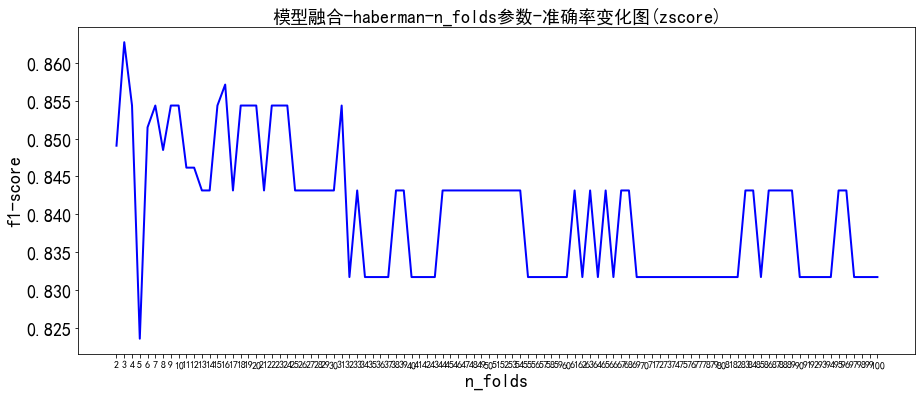

In [14]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from pylab import *                                 #支持中文
mpl.rcParams['font.sans-serif'] = ['SimHei']

#X轴，Y轴数据
# x = [0,1,2,3,4,5,6]
# y = [0.3,0.4,2,5,3,4.5,4]
plt.figure(figsize=(15,6)) #创建绘图对象
plt.plot(x,y,"b",linewidth=2)   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
plt.xticks(x, x)
plt.yticks(size=18)
plt.xlabel("n_folds",size=18) #X轴标签
plt.ylabel("f1-score",size=18)  #Y轴标签
plt.title("模型融合-haberman-n_folds参数-准确率变化图(zscore)",size=18) #图标题
# 设置数字标签
# for a, b in zip(x, y):
#     plt.text(a, b, b, ha='center', va='bottom')


plt.savefig("模型融合-haberman-n_folds参数选择图(zscore).png") #保存图
plt.show()  #显示图